## Exploratory Data Analysis (EDA)

In [1]:
%%capture
#Load data_preparation file
%run data_preparation.ipynb

In [2]:
#Get dataset statistics
dataset.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


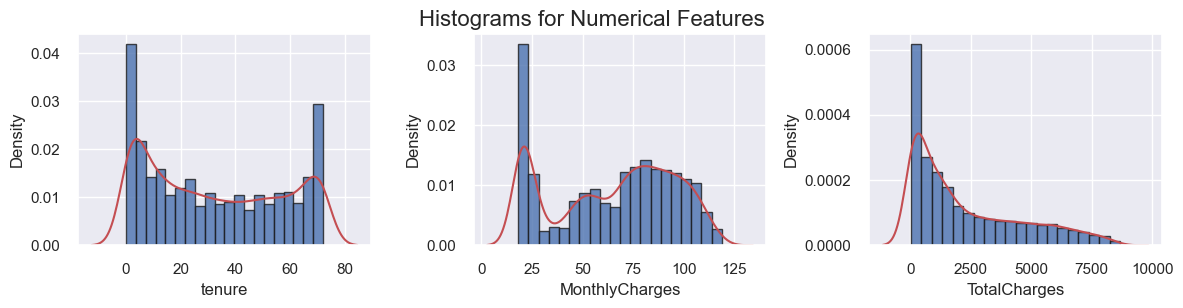

In [3]:
#Create subplots for each numerical feature
plt.figure(figsize=(12, 3))

#Loop through numerical columns
for i, column in enumerate(dataset.select_dtypes(include=["int64", "float"]), 1):
    plt.subplot(1, 3, i)
    plt.hist(dataset[column], bins=20, color="b", edgecolor="k", alpha=0.8, density = True)
    sns.kdeplot(dataset[column], color="r")
    plt.xlabel(column)
    plt.ylabel("Density")
    
plt.tight_layout()
plt.suptitle("Histograms for Numerical Features", fontsize=16, y=1.02)
plt.show()

In [4]:
def plot_categorical_value(a, b):
    #Get the categorical columns
    cat_columns = dataset.select_dtypes(include=["object"]).iloc[:, a:b]

    #Calculate the number of columns and rows
    columns = len(cat_columns.columns)
    rows = (columns + 2) // 3
    #Create subplots
    fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
    #Loop through categorical columns
    for i, column in enumerate(cat_columns.columns):
        row, col = i // 3, i % 3
        ax = axes[row, col]
        dataset[column].value_counts().plot(kind="bar", color="b", ax=ax)
        ax.set_title(f"Bar Chart for {column}", fontsize=12)
        ax.set_ylabel("Count")
        ax.tick_params("x", rotation=15)

    #Remove empty subplots if any
    for i in range(columns, rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.suptitle("Count for Categorical Features", fontsize=18, y=1.02)
    plt.show()

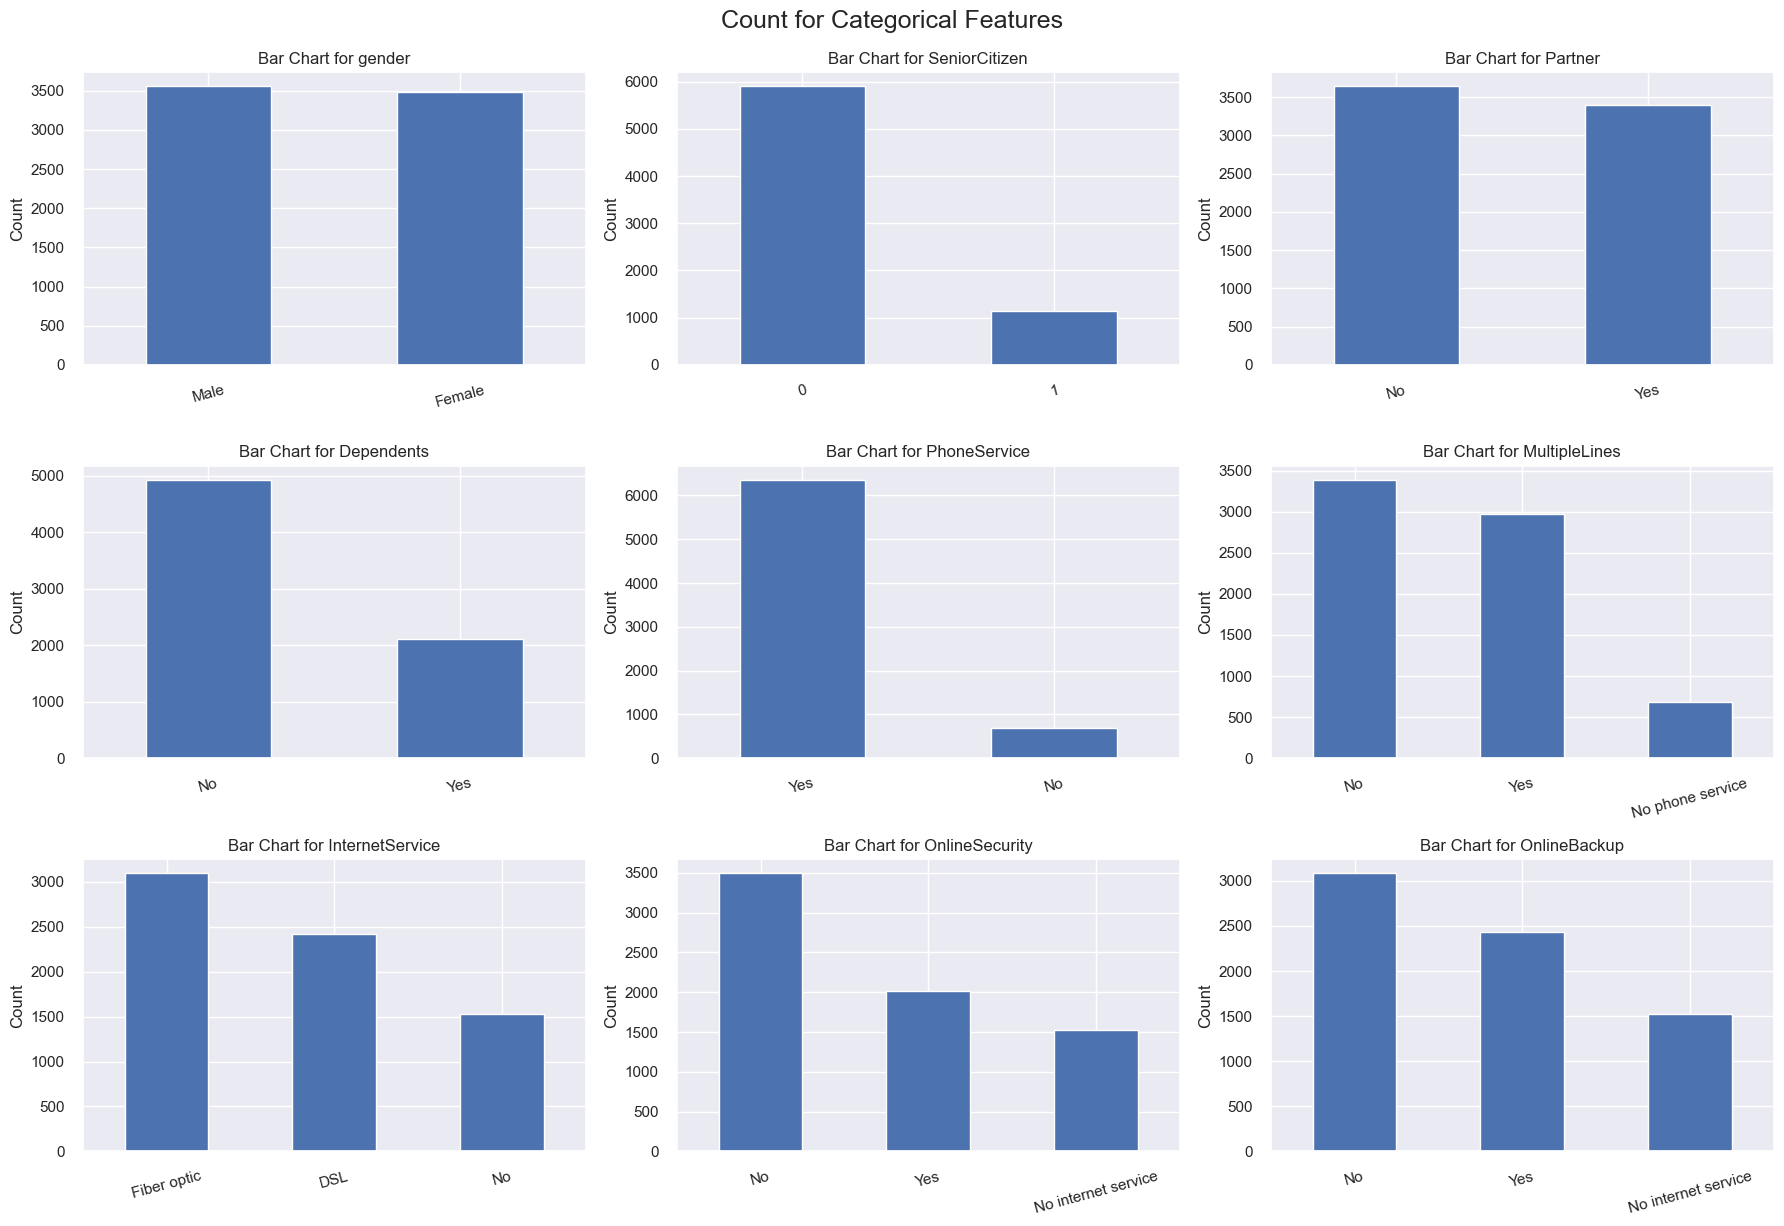

In [5]:
plot_categorical_value(1, 10)

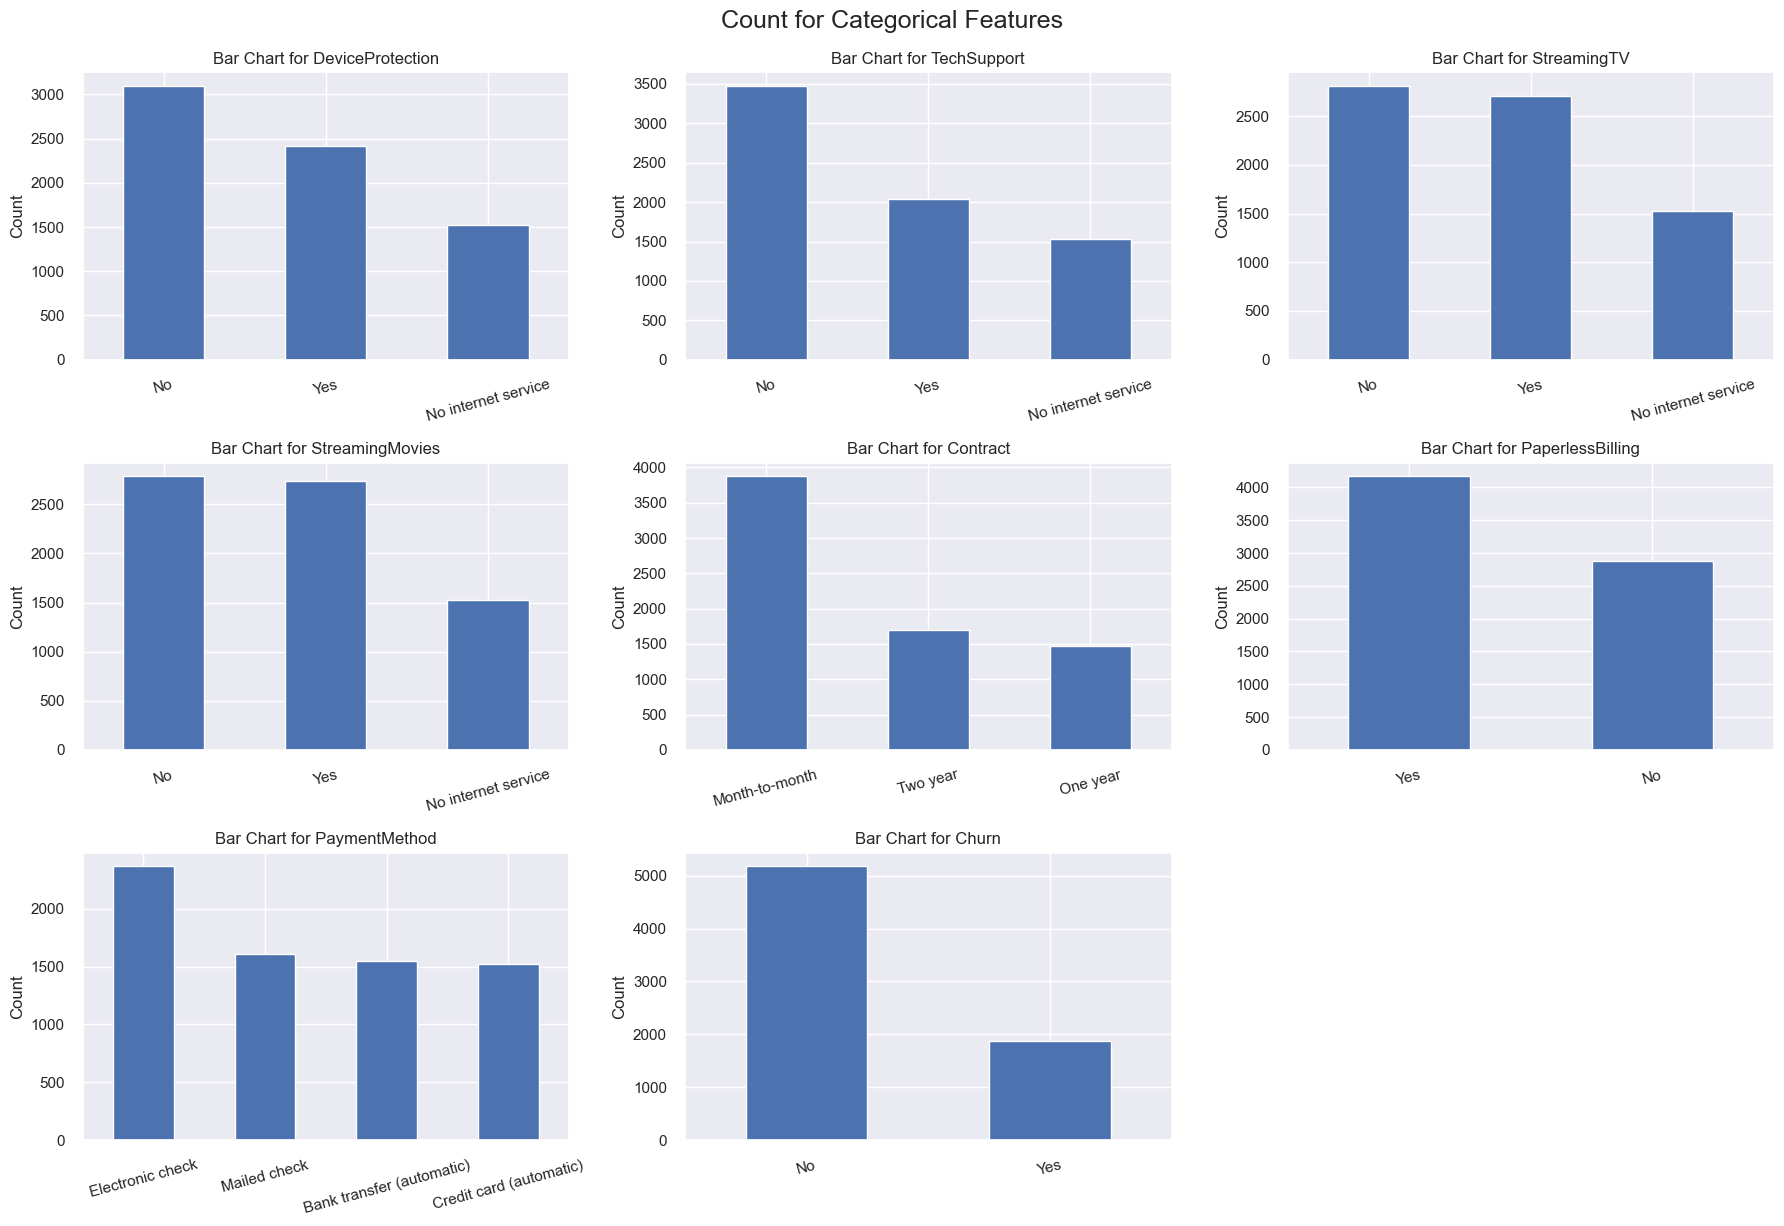

In [6]:
plot_categorical_value(10, 18)

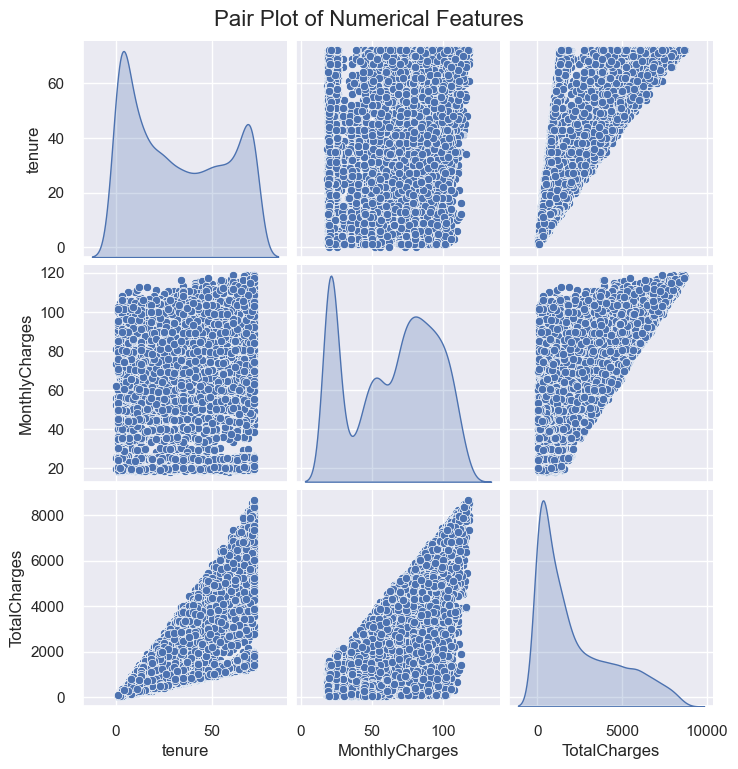

In [7]:
#Select numerical variable
numerical_variables = dataset[["tenure", "MonthlyCharges", "TotalCharges"]]

#Create pair plot
sns.pairplot(numerical_variables, diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", fontsize=16, y=1.02)

#Show the plot
plt.show()

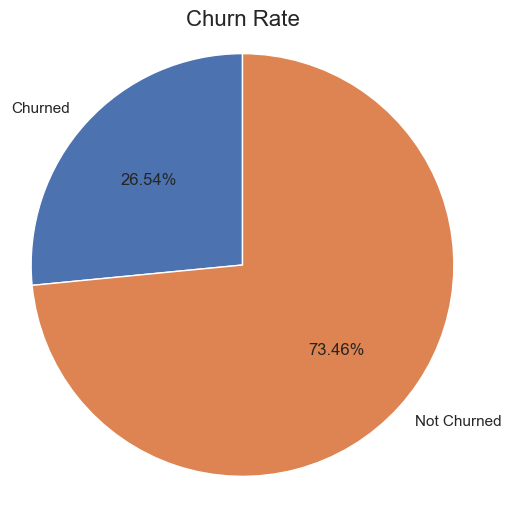

In [8]:
#Calculate the churn rate
churned_customers = (dataset["Churn"] == "Yes").sum()
rate = (churned_customers / len(dataset)) * 100

#Visualize the churn rate
plt.figure(figsize=(6, 6))
plt.pie([rate, (100 - rate)], 
        labels=["Churned", "Not Churned"], 
        autopct="%1.2f%%", startangle=90)
plt.title("Churn Rate",fontsize=16)
plt.axis("equal")

#Show the plot
plt.show()

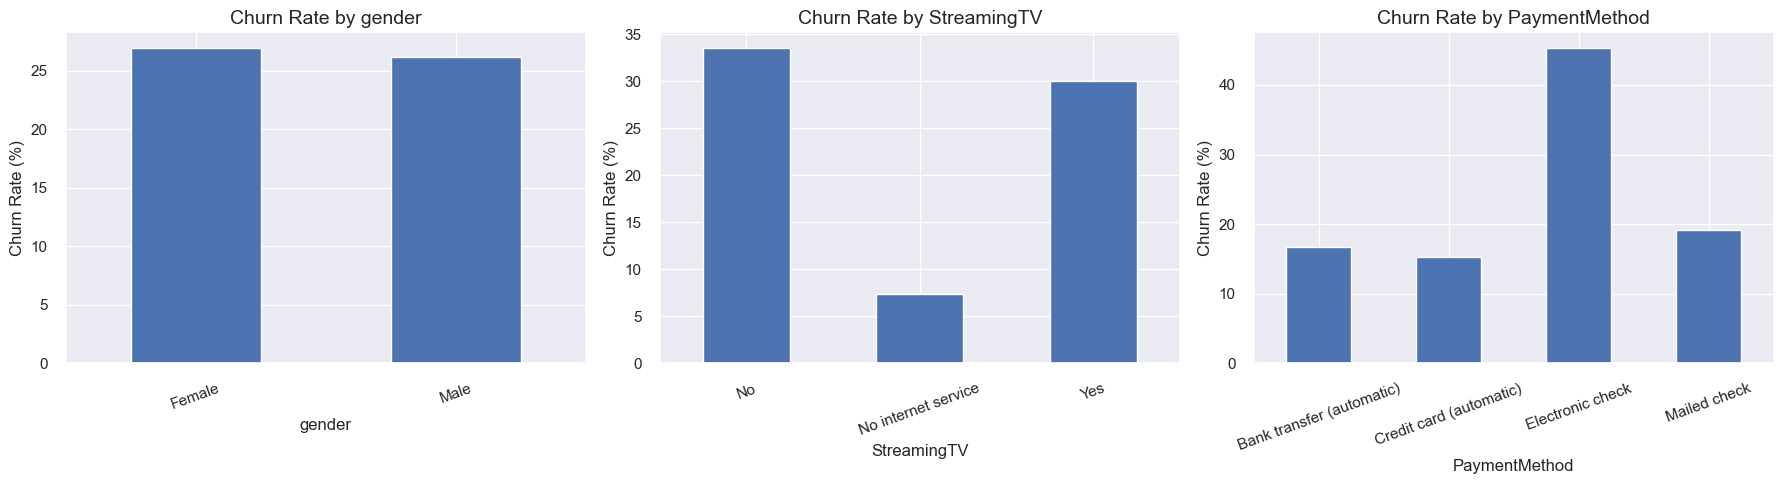

In [9]:
churn = dataset.copy() #Get a copy of the dataset
#Analyze by grouping
#Select categorical variables to analyze
variables = ["gender", "StreamingTV", "PaymentMethod"]

#Convert Churn column to numeric
churn["Churn"] = churn["Churn"].map({"Yes": 1, "No": 0})

#Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(variables), figsize=(18, 5))

#Loop through categorical variable
for i, variable in enumerate(variables):
    #Calculate churn rates for each category
    rates = churn.groupby(variable)["Churn"].mean() * 100

    ax = axes[i]
    rates.plot(kind="bar", color="b", ax=ax)
    ax.set_title(f"Churn Rate by {variable}", fontsize=14)
    ax.set_xlabel(variable)
    ax.set_ylabel("Churn Rate (%)")
    ax.tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()